<a href="https://colab.research.google.com/github/ChiaFengHong/MLMCUT/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

MEDV：自住房中位数价格，单位是千元

In [0]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
df=pd.DataFrame(boston['data'], columns=boston['feature_names'])
df['ans'] = boston['target']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [0]:
from sklearn.model_selection import train_test_split
#[90% 題目, 10%題目, 90%答案, 10%答案]
x_train, x_test, y_train, y_test = train_test_split(boston['data'], 
                                                    boston['target'], 
                                                    test_size=0.1)

In [0]:
#選擇建立模型的方法
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)


In [0]:
#做考古題(訓練模型)
reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

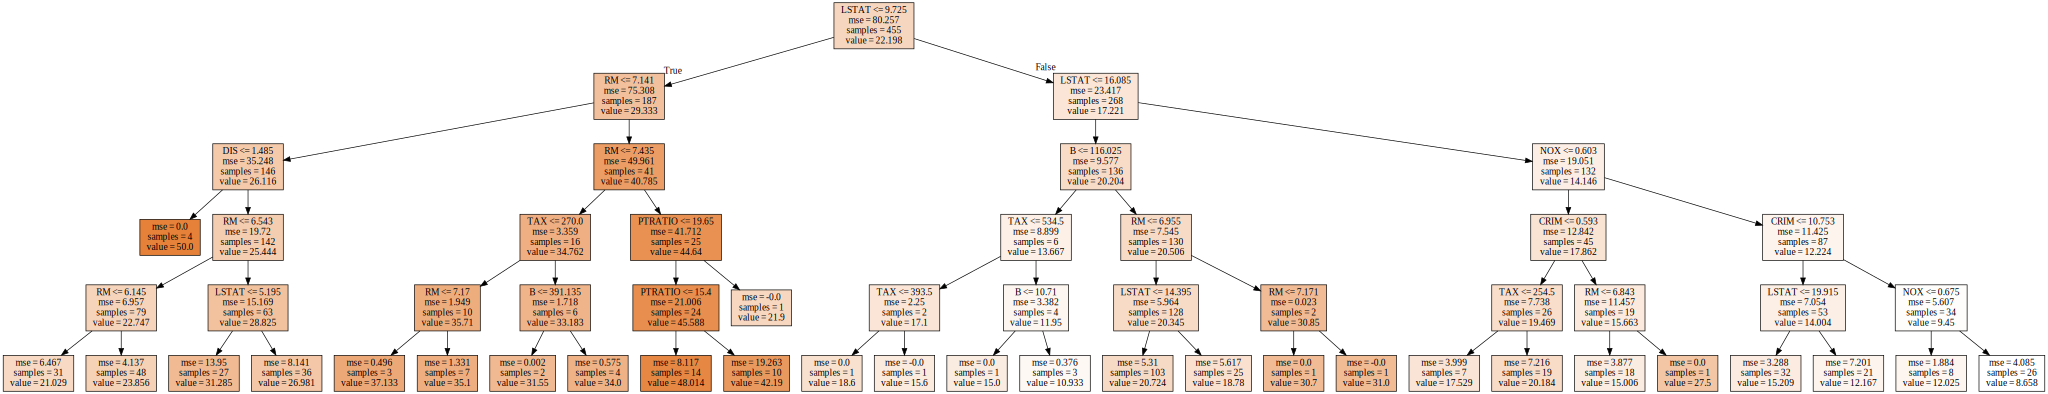

In [0]:
#https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q graphviz
import graphviz
from sklearn.tree import export_graphviz
g=export_graphviz(reg, 
                  feature_names=boston['feature_names'],
                  filled=True)
graphviz.Source(g)

In [0]:
#考試(驗證模型)
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
print('預測:', list(pre))
print('正確:', list(y_test))
print('R2:', r2_score(y_test, pre))



預測: [20.724271844660198, 31.55, 31.28518518518519, 18.779999999999998, 21.02903225806451, 26.980555555555558, 23.856250000000003, 23.856250000000003, 21.02903225806451, 31.55, 20.724271844660198, 21.02903225806451, 15.209374999999998, 42.190000000000005, 26.980555555555558, 23.856250000000003, 20.724271844660198, 23.856250000000003, 20.724271844660198, 31.28518518518519, 12.16666666666667, 15.005555555555553, 35.1, 48.01428571428572, 15.005555555555553, 15.005555555555553, 23.856250000000003, 50.0, 42.190000000000005, 26.980555555555558, 18.779999999999998, 31.0, 15.209374999999998, 30.7, 42.190000000000005, 20.724271844660198, 15.005555555555553, 15.209374999999998, 26.980555555555558, 18.779999999999998, 48.01428571428572, 12.025, 12.16666666666667, 34.0, 15.209374999999998, 18.779999999999998, 12.16666666666667, 20.724271844660198, 10.933333333333332, 26.980555555555558, 20.724271844660198]
正確: [21.2, 31.7, 37.2, 21.4, 18.9, 23.7, 23.4, 22.5, 36.2, 36.4, 29.6, 22.8, 18.1, 50.0, 23.6